In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp
# plt.style.use(['science','notebook'])

# Introduction

https://www.youtube.com/watch?v=U00Kseb6SB4

The purpose of Monte Carlo is to simulate a real life experiment that depends on randomness to some extent.

* Counting number of radioactive decays from some radioactive source in a time interval $\Delta t$. The random variable here number of counts $N$ (positive integer) and follows a **Poisson** probability mass function.

$$f(x) = \frac{e^{-\lambda} \lambda^x}{x!}$$

* Determining the energy of detected particles in a detector cell in the ATLAS calorimeter in a time interval $\Delta t$. The random variable here is energy $E$ (positive real number) and the corresponding probability density function is.

$$f(x) = F_1e^{-\sqrt{x/E_1}} + F_2e^{-\sqrt{x/E_2}}$$

* Determining the distance a particle travels through matter before it completely decays. The random variable here is distance $X$ and a really simple probability density function model might be

$$f(x) = \frac{x_0}{x^2} \hspace{10mm} x \geq x_0$$

* **Estimating a value for $\pi$**

For most cases this boils down into two steps

#### 1: Generate Random Variables According to a Distribution
#### 2: Use These Random Variables to Conduct Some Experiment

# 1: Generate Random Variables According to a Distribution

## 1.1 Inverting the CDF Analytically

**Theorem**: If a random variable $X$ has a CDF of $F(x)$ then the variable $F^{-1}(U)$, where $U$ is a random uniform variable between 0 and 1, also has CDF $F(x)$

$$X \sim F(x) \implies F^{-1}(U) \sim F(x)$$

**Example**: The exponential distribution is

$$f(x) = \lambda e^{-\lambda x} \implies F(x) = 1-e^{-\lambda x}$$

In [3]:
x = np.linspace(0,3,100)
f = 2*np.exp(-2*x)
F = 1-np.exp(-2*x)

Plot

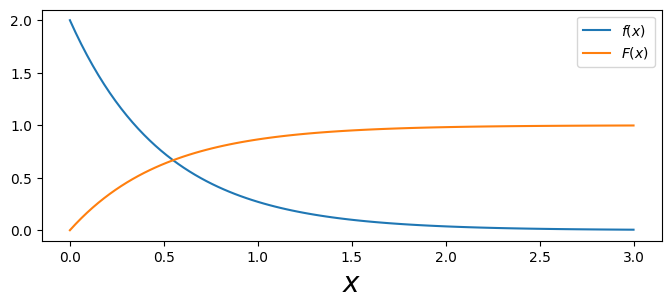

In [4]:
plt.figure(figsize=(8,3))
plt.plot(x, f, label=r'$f(x)$')
plt.plot(x,F, label=r'$F(x)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.legend()
plt.show()

Using $F[F^{-1}(x)]=x$ We get

$$1-e^{-\lambda F^{-1}(x)} = x \implies \boxed{F^{-1}(x) = -\frac{\ln(1-x)}{\lambda}}$$

So if we evaluate a bunch of random uniform variables $U$ and evaluate $F^{-1}(U)$, they should be distributed according to $f(x)$ above

In [5]:
Us = np.random.rand(10000)

In [6]:
Us = np.random.rand(10000)
F_inv_Us = -np.log(1-Us)/2

Lets plot these and see if they really are distributed according to $f(x)$

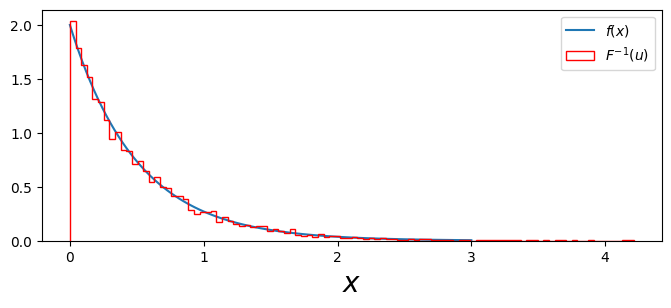

In [7]:
plt.figure(figsize=(8,3))
plt.plot(x, f, label=r'$f(x)$')
plt.hist(F_inv_Us, histtype='step', color='red', density='norm', bins=100, label='$F^{-1}(u)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.legend()
plt.show()

## 1.2 Using a Search Sort Algorithm

Sometimes $F(x)$ isn't invertible analystically. BUT

* $F(x)$ is always increasing with $x$

So it is necessarily invertible (there just might not be a formula for it).

$$f(x) = F_1e^{-\sqrt{x/E_1}} + F_2e^{-\sqrt{x/E_2}}$$

In [8]:
x, y, F1, F2, E1, E2 = smp.symbols('x y F_1 F_2 E_1 E_2', real=True, positive=True)
fs = F1*smp.exp(-smp.sqrt(x/E1)) + F2*smp.exp(-smp.sqrt(x/E2))
fs

F_1*exp(-sqrt(x)/sqrt(E_1)) + F_2*exp(-sqrt(x)/sqrt(E_2))

In [9]:
Fs = smp.integrate(fs, (x,0,y)).doit()
Fs

2*E_1*F_1 + 2*E_2*F_2 + F_1*(-2*sqrt(E_1)*sqrt(y)*exp(-sqrt(y)/sqrt(E_1)) - 2*E_1*exp(-sqrt(y)/sqrt(E_1))) + F_2*(-2*sqrt(E_2)*sqrt(y)*exp(-sqrt(y)/sqrt(E_2)) - 2*E_2*exp(-sqrt(y)/sqrt(E_2)))

In [10]:
Fn = smp.lambdify((y, E1, E2, F1, F2), Fs)
fn = smp.lambdify((x, E1, E2, F1, F2), fs)

Get parameters and actual numerical values

In [11]:
E1 = E2 = 0.2
F1 = 1.3
F2 = 1.4
x = np.linspace(0,5,1000)
f = fn(x, E1, E2, F1, F2)
F = Fn(x, E1, E2, F1, F2)

Plot

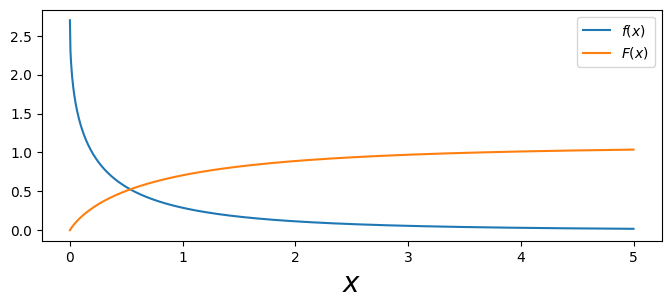

In [12]:
plt.figure(figsize=(8,3))
plt.plot(x, f, label=r'$f(x)$')
plt.plot(x,F, label=r'$F(x)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.legend()
plt.show()

Clearly $F(x)$ is always increasing but inverting that formula would be a real pain. How can we approximate $F^{-1}(x)$ given he information we have?

In [13]:
F_inv_Us = x[np.searchsorted(F[:-1], Us)]

Plot

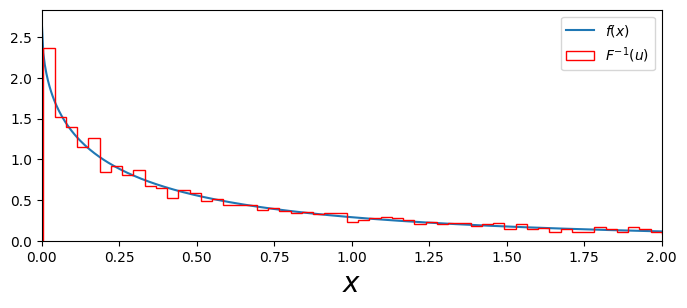

In [14]:
plt.figure(figsize=(8,3))
plt.plot(x, f, label=r'$f(x)$')
plt.hist(F_inv_Us, histtype='step', color='red', density='norm', bins=100, label='$F^{-1}(u)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.legend()
plt.xlim(0,2)
plt.show()

## 1.3 Built In Random Variables

In [15]:
r = np.random.rayleigh(size=1000)

Plot

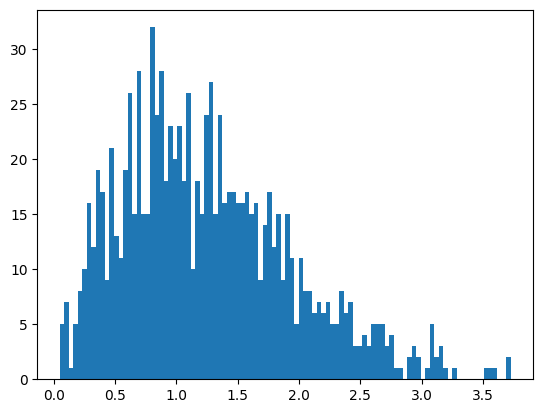

In [16]:
plt.hist(r, bins=100)
plt.show()

Many other function too:

In [17]:
np.random?

Type:        module
String form: <module 'numpy.random' from 'c:\\Users\\yaniv\\OneDrive\\python-flask\\venv\\lib\\site-packages\\numpy\\random\\__init__.py'>
File:        c:\users\yaniv\onedrive\python-flask\venv\lib\site-packages\numpy\random\__init__.py
Docstring:  
Random Number Generation

Use ``default_rng()`` to create a `Generator` and call its methods.

=============== =========================================================
Generator
--------------- ---------------------------------------------------------
Generator       Class implementing all of the random number distributions
default_rng     Default constructor for ``Generator``
=============== =========================================================

============================================= ===
BitGenerator Streams that work with Generator
--------------------------------------------- ---
MT19937
PCG64
PCG64DXSM
Philox
SFC64
============================================= ===

========================================

# 2: Use These Random Variables To Conduct an Experiment

* The amount of particles that enter a detector in 10s is a random variable $X$ with distribution 

$$f(x) = \frac{e^{-\lambda} \lambda^x}{x!}$$

* The energy deposited by each particle is a random variable $E$ with distribution

$$g(x) = F_1e^{-\sqrt{x/E_1}} + F_2e^{-\sqrt{x/E_2}}$$

The parameters are 
* $\lambda = 4$
* $F_1=1.3$ GeV$^{-1}$
* $F_2=1.4$ GeV$^{-1}$
* $E_1=0.1$ GeV
* $E_2=0.2$ GeV

Simulate the energy in the detector over 100000 experiments of 10 seconds each. Plot the distribution

In [18]:
N = 100000

# Part 1 
X = np.random.poisson(lam=4, size=N)

# Part 2
x = np.linspace(0,5,1000)
F = Fn(x, E1, E2, F1, F2) # energy distribution integral
Us = np.random.rand(X.sum())
E = x[np.searchsorted(F[:-1], Us)] # energy

Get a net sum of how many particles were detected total after $n$ experiments:

In [19]:
idx = np.insert(X.cumsum(), 0, 0)[:-1]
idx[0:10]

array([ 0,  1,  7,  9, 17, 18, 21, 28, 31, 38])

Use these values to sum energies for each experiment.

In [20]:
E[0:10]

array([0.94594595, 1.09109109, 0.04004004, 0.08508509, 0.29029029,
       0.67067067, 0.16516517, 0.97597598, 2.04704705, 1.97197197])

In [21]:
E_10s = np.add.reduceat(E, idx)

In [22]:
E_10s

array([0.94594595, 2.34234234, 3.02302302, ..., 4.61961962, 0.55055055,
       5.90590591])

Plot

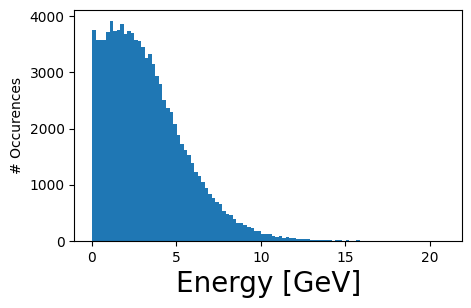

In [23]:
plt.figure(figsize=(5,3))
plt.hist(E_10s, bins=100)
plt.xlabel('Energy [GeV]', fontsize=20)
plt.ylabel('# Occurences')
plt.show()

This distribution is very interesting, and probably doesn't have a name, but it helps us with our experimental planning

In [24]:
np.sum(E_10s>7.5)/len(E_10s)

0.05326

So 5% of the time we expect more than 7.5GeV of energy to be deposited in the detector within 10s. This mght be useful when planning for resources, such as requirements for detecting this much energy!